In [ ]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [32]:
import pandas as pd
from fbprophet import Prophet

In [20]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2015, 7, 1)
end = datetime(2018, 7, 19)
pypl = web.DataReader('PYPL', 'morningstar', start, end)

Close     High    Low   Open   Volume
Symbol Date                                             
PYPL   2018-07-13  87.99  89.1000  86.83  89.00  6110637
       2018-07-16  87.77  88.3413  87.48  88.26  4452265
       2018-07-17  88.58  88.7200  86.59  87.25  5086126
       2018-07-18  88.22  88.9300  87.68  88.70  4797062
       2018-07-19  87.38  88.5900  87.16  88.00  5612878

In [92]:
pypl.tail()

Close     High    Low   Open   Volume
Symbol Date                                             
PYPL   2018-07-13  87.99  89.1000  86.83  89.00  6110637
       2018-07-16  87.77  88.3413  87.48  88.26  4452265
       2018-07-17  88.58  88.7200  86.59  87.25  5086126
       2018-07-18  88.22  88.9300  87.68  88.70  4797062
       2018-07-19  87.38  88.5900  87.16  88.00  5612878

In [93]:
pypl.head()

Close     High      Low   Open   Volume
Symbol Date                                               
PYPL   2015-07-06  36.71  39.7500  36.0000  38.00  5866647
       2015-07-07  36.62  37.8100  36.0000  37.72  7358964
       2015-07-08  34.70  36.3600  34.5300  36.34  5387749
       2015-07-09  34.50  35.5199  33.9900  35.10  3760051
       2015-07-10  34.69  35.1900  33.9805  34.66  4472801

In [94]:
df = pypl.reset_index()

In [95]:
list(df)

['Symbol', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [96]:
df = df.drop(['Symbol','High', 'Low','Open','Volume'], axis=1)

In [97]:
list(df)

['Date', 'Close']

In [86]:
#Rename columns to 'ds' and 'y'
df.rename(columns={'Close':'y','Date':'ds'}, inplace=True)
df.head()

,ds,y
0,2015-07-06,36.71
1,2015-07-07,36.62
2,2015-07-08,34.70
3,2015-07-09,34.50
4,2015-07-10,34.69


In [ ]:
#We fit the model by instantiating a new Prophet object. 
#Any settings to the forecasting procedure are passed into the constructor. 
#Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [ ]:
m = Prophet()
m.fit(df)

In [88]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1154,2019-07-15
1155,2019-07-16
1156,2019-07-17
1157,2019-07-18
1158,2019-07-19


In [89]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1154,2019-07-15,109.026568,88.154066,128.028784
1155,2019-07-16,109.225462,88.206417,128.928694
1156,2019-07-17,109.518179,88.570718,128.890924
1157,2019-07-18,109.774747,88.457000,129.286754
1158,2019-07-19,109.945511,87.749330,129.084032


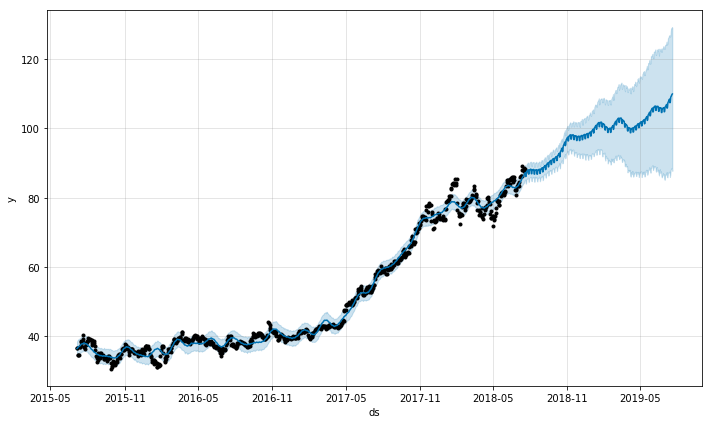

In [90]:
fig1 = m.plot(forecast)

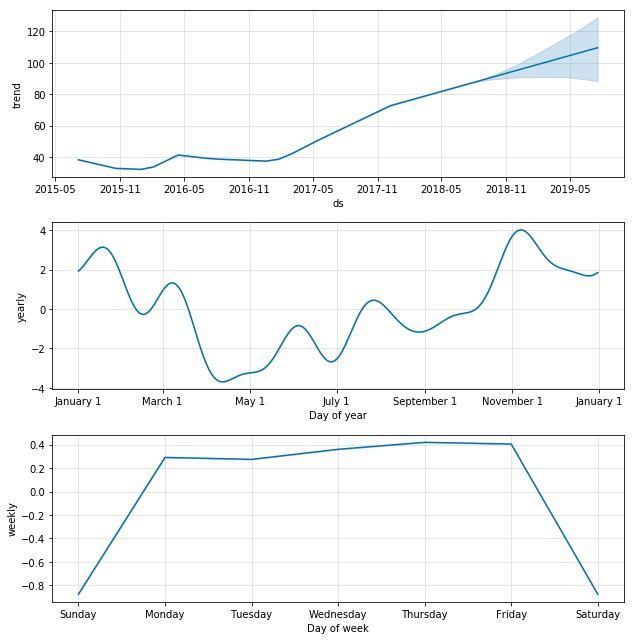

In [91]:
fig2 = m.plot_components(forecast)